<a href="https://colab.research.google.com/github/190031319PHemanthBhargav/machine-learning-projects/blob/main/Stock_Prediction_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Stocks prediction using machine learning model
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from scipy import stats
import seaborn as sns

In [ ]:
stock_data = pd.read_csv('/content/MW-Pre-Open-Market-11-Mar-2021.csv',index_col="Date",parse_dates=True)

stock_data


,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...
2016-12-23,790.90,792.74,787.28,789.91,"623,400"
2016-12-27,790.68,797.86,787.66,791.55,"789,100"
2016-12-28,793.70,794.23,783.20,785.05,"1,153,800"


In [ ]:
stock_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
stock_data.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


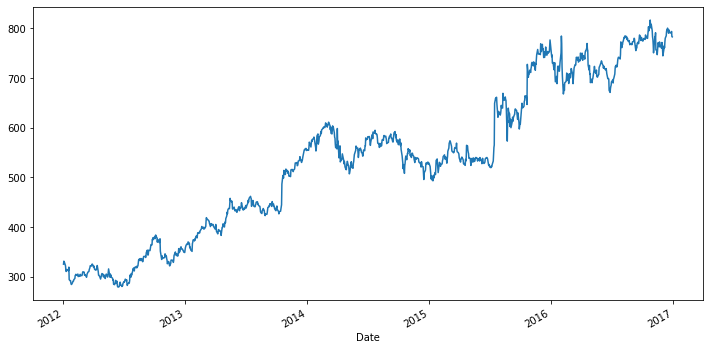

In [ ]:
stock_data['Open'].plot(figsize=(12,6))

In [ ]:
#converting the column 'a' of a dataframe
stock_data['Close'] = stock_data['Close'].str.replace(',','').astype(float)

In [ ]:
stock_data['Volume'] = stock_data['Volume'].str.replace(',', '').astype(float)


,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


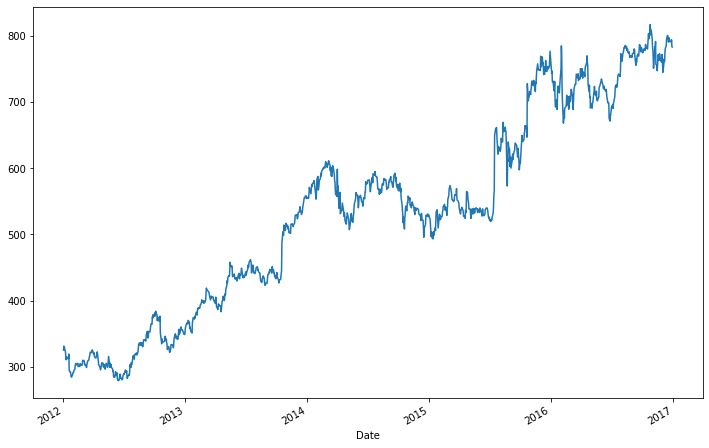

In [ ]:
#rollover mean of 7 days data
stock_data['Open'].plot(figsize=(12,8))
stock_data.rolling(7).mean().head(20)

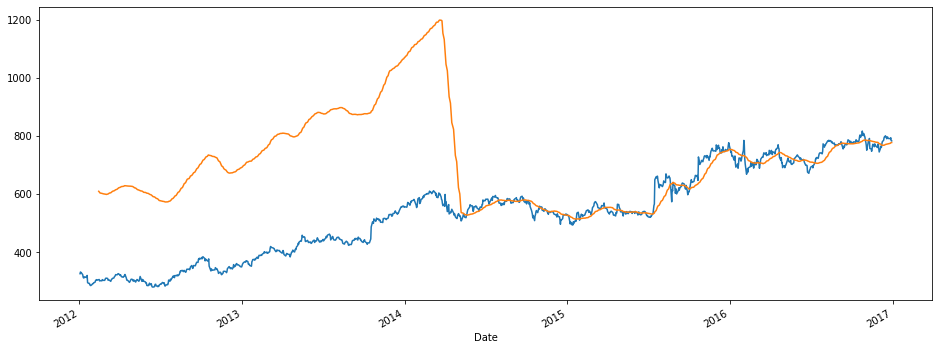

In [ ]:
stock_data['Open'].plot(figsize=(16,6))
stock_data.rolling(window=30).mean()['Close'].plot()

In [ ]:
stock_data['Close: 30 day Mean'] = stock_data['Close'].rolling(window=30).mean()
stock_data[['Close','Close: 30 day Mean']].plot(figsize=(16,6))

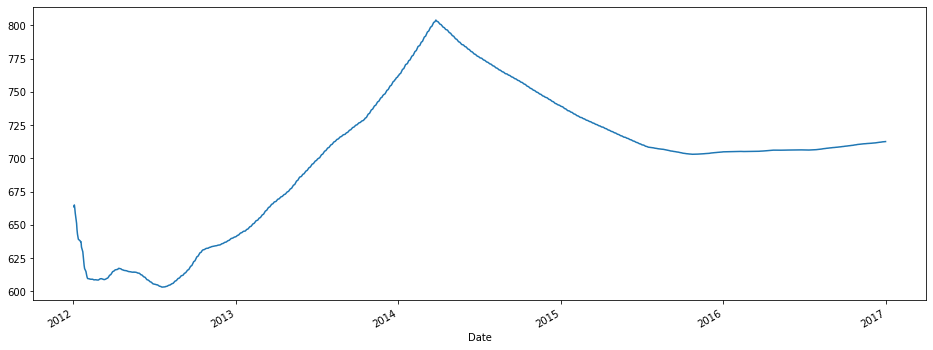

In [ ]:
#optional specify of a min. number of periods
stock_data['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


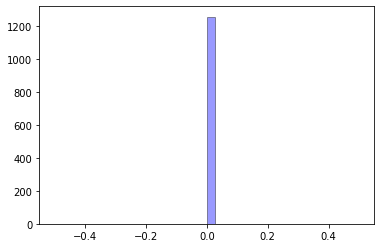

In [ ]:

pdf = stats.norm.pdf(stock_data['Volume'])
sns.distplot(pdf, hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})

[1. 1. 1. ... 1. 1. 1.]


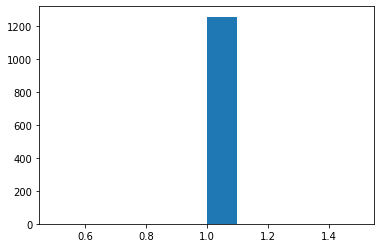

In [ ]:
cdf = stats.norm.cdf(stock_data['Volume'])
x = cdf
print(x)
plt.hist(x,bins = 10)
plt.show()

In [ ]:
pip install sklearn

In [ ]:
training_set = stock_data['Open']
training_set = pd.DataFrame(training_set)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0, 1))
training_set_Scaled = sc.fit_transform(training_set)

In [ ]:
#creating a data structure with 60 timestamps and 1 output
x_train = []
y_train = []
for i in range(60,1250):
  x_train.append(training_set_Scaled[i-60:i, 0])
  y_train.append(training_set_Scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

# reshaping
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
pip install keras

In [ ]:
#part 2 - building the RNN model
#keras is the tensorflow high-level API for building and training deep learning models
from keras.models import Sequential #linear stack of layers which you can create a sequential model by passing the list through it
from keras.layers import Dense #the most common and frequently used layers,used to change the dimensions output 
from keras.layers import LSTM #
from keras.layers import Dropout

In [ ]:
#initialising the rnn model
regressor = Sequential()


In [ ]:
#adding the first lstm layer and some droput regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

#adding a second LSTM Layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

#Adding a 3rd LSTM layer and some dropout regularisation
regressor.add(Dropout(0.2))

#Adding a 4th layer and some dropout regularisation
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units = 1))


In [ ]:
#compiling the rnn model
regressor.compile(optimizer='adam',loss='mean_squared_error')

#fitting the rnn to the training set
regressor.fit(x_train, y_train, epochs = 100, batch_size= 32)

Epoch 1/100
38/38 [==============================] - 10s 98ms/step - loss: 0.0324
Epoch 2/100
38/38 [==============================] - 4s 96ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 4s 98ms/step - loss: 0.0053
Epoch 4/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0046
Epoch 5/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0046
Epoch 6/100
38/38 [==============================] - 4s 96ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0043
Epoch 8/100
38/38 [==============================] - 4s 96ms/step - loss: 0.0040
Epoch 9/100
38/38 [==============================] - 4s 98ms/step - loss: 0.0041
Epoch 10/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0038
Epoch 11/100
38/38 [==============================] - 4s 98ms/step - loss: 0.0037
Epoch 12/100
38/38 [==============================] - 4s 97ms/step - loss: 0.0046
Epoch 13/100
38/38 [====

In [ ]:
# Making the predictions and visualising the results

#getting the real stock price of 2017
stock_test = pd.read_csv('/content/MW-Pre-Open-Market-11-Mar-2021.csv', index_col = "Date", parse_dates=True)


In [ ]:
real_stock_price = stock_test.iloc[:, 1:2].values

In [ ]:
stock_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
stock_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


In [ ]:
stock_test['Volume'] = stock_test["Volume"].str.replace(',', '').astype(float)


In [ ]:
test_set = stock_test['Open']
test_set = pd.DataFrame(test_set)

In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
dtypes: float64(1)
memory usage: 19.7 KB


In [ ]:
#getting the predicted stock price of 2017
stock_total = pd.concat((stock_data['Open'], stock_test['Open']),axis = 0)
inputs = stock_total[len(stock_total) - len(stock_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test = []
for i in range(60,80):
  x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)  

In [ ]:
predicted_stock_price = pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


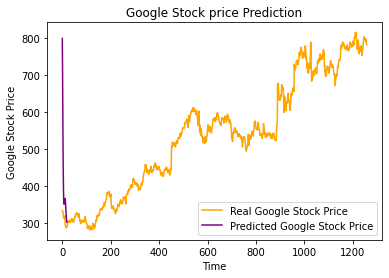

In [ ]:
plt.plot(real_stock_price,color="orange", label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'purple', label='Predicted Google Stock Price')
plt.title('Google Stock price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [ ]:
pip install TA_Lib-0.4.17-cp37-cp37m-win_amd64.whl


ERROR: TA_Lib-0.4.17-cp37-cp37m-win_amd64.whl is not a supported wheel on this platform.
